<a href="https://colab.research.google.com/github/Peksyaji/VARMA/blob/main/VARMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Peksyaji/VARMA/main/Data%20Ekspor%20Migas.csv', sep=';')
df.head()

,Tahun,Minyak_Mentah_Ekspor,Hasil_Minyak_Ekspor,Gas_Ekspor
0,1996,38254.9,10689.3,29343.6
1,1997,38976.5,10220.8,29015.6
2,1998,36914.0,8435.9,28953.5
3,1999,35902.5,7825.4,30066.3
4,2000,29225.9,8786.6,27615.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Tahun                 26 non-null     int64  
 1   Minyak_Mentah_Ekspor  26 non-null     float64
 2   Hasil_Minyak_Ekspor   26 non-null     float64
 3   Gas_Ekspor            26 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 960.0 bytes


In [ ]:
import matplotlib.pyplot as plt

[]

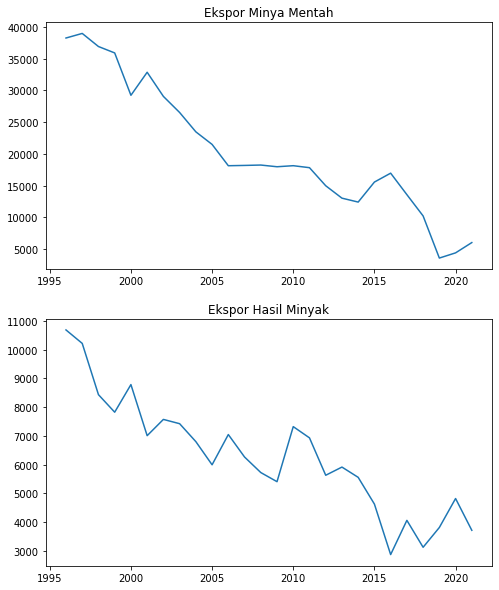

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(8,10))
axes[0].plot(df['Tahun'], df['Minyak_Mentah_Ekspor'])
axes[0].set_title('Ekspor Minyak Mentah', fontsize=12)
axes[1].plot(df['Tahun'], df['Hasil_Minyak_Ekspor'])
axes[1].set_title('Ekspor Hasil Minyak', fontsize=12)
plt.plot()

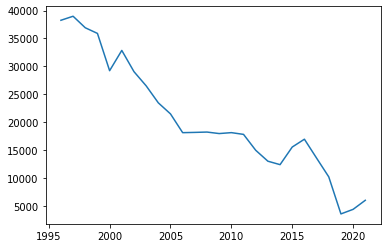

In [ ]:
plt.plot(df.Tahun, df.Minyak_Mentah_Ekspor)
plt.title('Ekspor Minyak Mentah Tiap Tahun')

Text(0.5, 1.0, 'Ekspor Hasil Minyak Tiap Tahun')

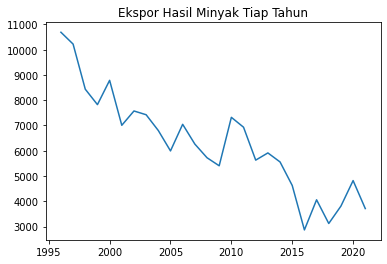

In [ ]:
plt.plot(df.Tahun, df.Hasil_Minyak_Ekspor)
plt.title('Ekspor Hasil Minyak Tiap Tahun')

Text(0.5, 1.0, 'Ekspor Gas Tiap Tahun')

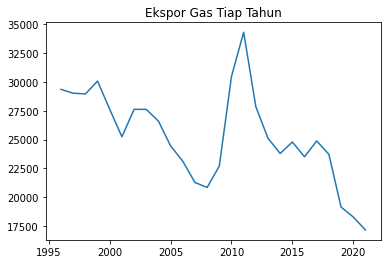

In [ ]:
plt.plot(df.Tahun, df.Gas_Ekspor)
plt.title('Ekspor Gas Tiap Tahun')

# Uji Stasioneritas

## ADF Unit Root

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
def adfuller_test(df):
    result = adfuller(df, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')

In [ ]:
adfuller_test(df['Hasil_Minyak_Ekspor'])

ADF Statistic: -2.048087238509643
p-value: 0.2658943628707755
Critial Values:
   1%, -3.7238633119999998
Critial Values:
   5%, -2.98648896
Critial Values:
   10%, -2.6328004


p-value = 0.2658943628707755

Tolak H0 -> Data hasil minyak tidak stasioner

In [ ]:
adfuller_test(df['Minyak_Mentah_Ekspor'])

ADF Statistic: -1.630614937130309
p-value: 0.4671688469197982
Critial Values:
   1%, -3.769732625845229
Critial Values:
   5%, -3.005425537190083
Critial Values:
   10%, -2.6425009917355373


p-value = 0.4671688469197982

Tolak H0 -> Data minyak mentah tidak stasioner

In [ ]:
adfuller(df['Gas_Ekspor'])

(-2.271891552018034,
 0.18119379468227836,
 1,
 24,
 {'1%': -3.7377092158564813,
  '5%': -2.9922162731481485,
  '10%': -2.635746736111111},
 302.9063633624297)

p-value = 0.18119379468227836

Tolak H0 -> Data gas tidak stasioner

## ACF PACF

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

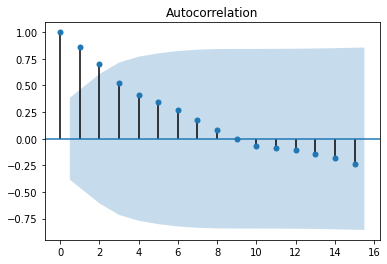

In [ ]:
plot_acf(df.Minyak_Mentah_Ekspor)
plt.title('Plot ACF Minyak Mentah')
plt.show()

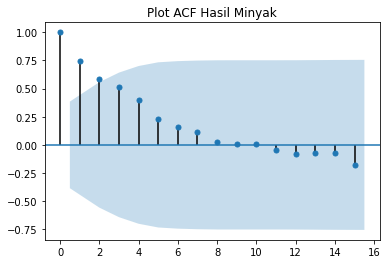

In [ ]:
plot_acf(df.Hasil_Minyak_Ekspor)
plt.title('Plot ACF Hasil Minyak')
plt.show()

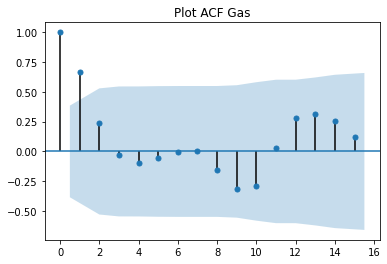

In [ ]:
plot_acf(df.Gas_Ekspor)
plt.title('Plot ACF Gas')
plt.show()

ValueError: ignored

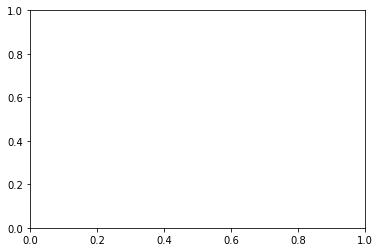

In [ ]:
plot_pacf(df['Minyak_Mentah_Ekspor'])
plt.title('Plot ACF Minyak Mentah')
plt.show()

ValueError: ignored

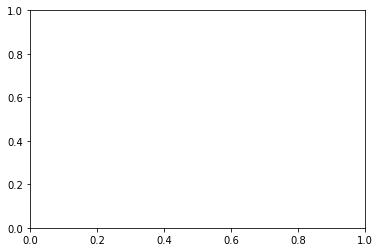

In [ ]:
plot_pacf(df.Hasil_Minyak_Ekspor)
plt.title('Plot ACF Hasil Minyak')
plt.show()

ValueError: ignored

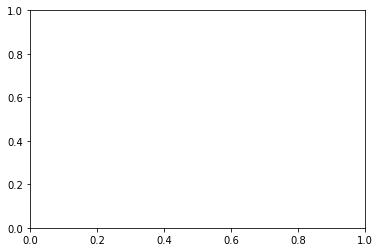

In [ ]:
plot_pacf(df.Gas_Ekspor)
plt.title('Plot PACF Gas')
plt.show()

## Differencing

In [ ]:
import copy

In [ ]:
diff_1 = copy.copy(df)
diff_1.drop(columns='Gas_Ekspor', inplace=True)
diff_1['Minyak_Mentah_Ekspor'] = diff_1['Minyak_Mentah_Ekspor'].diff()
diff_1['Hasil_Minyak_Ekspor'] = diff_1['Hasil_Minyak_Ekspor'].diff()
diff_1.dropna(inplace=True)
diff_1.head()

,Tahun,Minyak_Mentah_Ekspor,Hasil_Minyak_Ekspor
1,1997,721.6,-468.5
2,1998,-2062.5,-1784.9
3,1999,-1011.5,-610.5
4,2000,-6676.6,961.2
5,2001,3631.1,-1778.8


## ADF Ulang

In [ ]:
adfuller_test(diff_1['Minyak_Mentah_Ekspor'])

ADF Statistic: -4.0246966381611395
p-value: 0.0012865726366233304
Critial Values:
   1%, -3.769732625845229
Critial Values:
   5%, -3.005425537190083
Critial Values:
   10%, -2.6425009917355373


In [ ]:
adfuller_test(diff_1['Hasil_Minyak_Ekspor'])

ADF Statistic: -6.335431980549316
p-value: 2.8383801153646096e-08
Critial Values:
   1%, -3.7377092158564813
Critial Values:
   5%, -2.9922162731481485
Critial Values:
   10%, -2.635746736111111


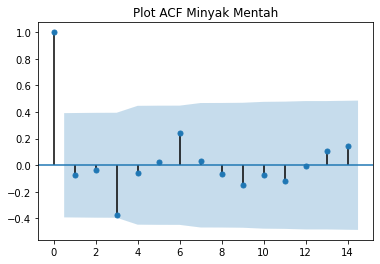

In [ ]:
plot_acf(diff_1.Minyak_Mentah_Ekspor)
plt.title('Plot ACF Minyak Mentah')
plt.show()

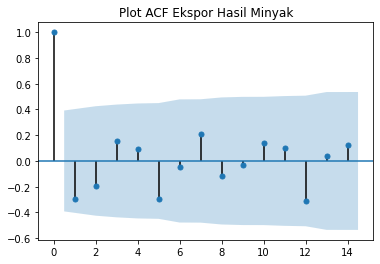

In [ ]:
plot_acf(diff_1.Hasil_Minyak_Ekspor)
plt.title('Plot ACF Ekspor Hasil Minyak')
plt.show()

## VARMAX

In [ ]:
from statsmodels.tsa.statespace.varmax import VARMAX

In [ ]:
model = VARMAX(diff_1[['Minyak_Mentah_Ekspor','Hasil_Minyak_Ekspor']], order=(1,1))
res = model.fit()
print(res.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                                          Statespace Model Results                                         
Dep. Variable:     ['Minyak_Mentah_Ekspor', 'Hasil_Minyak_Ekspor']   No. Observations:                   25
Model:                                                  VARMA(1,1)   Log Likelihood                -431.878
                                                       + intercept   AIC                            889.757
Date:                                             Fri, 23 Dec 2022   BIC                            905.602
Time:                                                     17:13:04   HQIC                           894.152
Sample:                                                          0                                         
                                                              - 25                                         
Covariance Type:                                               opg                                         
Ljung-Box (L1) (Q):         

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


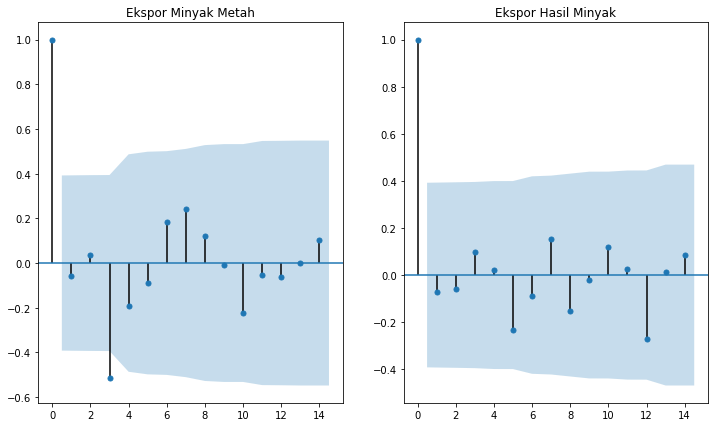

In [ ]:
plt.figure(figsize = (12, 7))
ax1= plt.subplot(1,2,1)
plot_acf(res.resid['Minyak_Mentah_Ekspor'].values, title = 'Ekspor Minyak Metah',  alpha = 0.05, ax = ax1)
ax2 = plt.subplot(1,2,2)
plot_acf(res.resid['Hasil_Minyak_Ekspor'].values, title = 'Ekspor Hasil Minyak',  alpha = 0.05, ax = ax2)

plt.show()

Uji Durbin Watson

In [ ]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(res.resid)
out

array([2.08838505, 2.03534078])

https://github.com/nicolycosta/Vector-Autoregressive-Moving-Average-/blob/main/VARMA.ipynb

https://github.com/zilinch/ARIMA-VARMA-Stock-Model/blob/main/VARMA.ipynb